<a href="https://colab.research.google.com/github/L16Aya/ap155_OUTPUTS/blob/main/Ladder_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. distinct resistors

In [7]:
import numpy as np

def build_resistor_matrix(n, r1, r2, r3, r4, vin):
    N = 2*n + 1 # number of resistors
    resistor_mat = np.zeros((N, N))
    volt_vec = np.zeros(N)

    resistor_mat[0, 0] = r1
    resistor_mat[0, -1] = r4
    volt_vec[0] = vin

    resistor_mat[1, 0] = r1
    resistor_mat[1, 1] = r2
    resistor_mat[1, 2] = r3
    volt_vec[1] = vin

    for i in range(2, N-2):
        if i % 2 == 0:  # even index = bottom
            resistor_mat[i, i-1] = r2
            resistor_mat[i, i+1] = r4
            volt_vec[i] = vin
        else:           # odd index = top
            resistor_mat[i, i-1] = 1
            resistor_mat[i, i] = -1
            resistor_mat[i, i+1] = 1
            resistor_mat[i, i+2] = -1

    # Last two rows (Kirchhoff junction rules)
    resistor_mat[-2, :] = [1, -1, 0, 1, -1] + [0]*(N-5)
    resistor_mat[-1, :] = [-1, -1, 0, 1, 1] + [0]*(N-5)

    return resistor_mat, volt_vec

# Example for n=2
r1, r2, r3, r4 = 1, 1, 2, 2
vin = 5
resistor_mat, volt_vec = build_resistor_matrix(2, r1, r2, r3, r4, vin)

print("Matrix:")
print(resistor_mat)

# Solve for effective resistance
currents = np.linalg.solve(resistor_mat, volt_vec)
print("Currents:", currents)
print("Effective Resistance:", vin / sum(currents))

Matrix:
[[ 1.  0.  0.  0.  2.]
 [ 1.  1.  2.  0.  0.]
 [ 0.  1.  0.  2.  0.]
 [ 1. -1.  0.  1. -1.]
 [-1. -1.  0.  1.  1.]]
Currents: [1.66666667 1.66666667 0.83333333 1.66666667 1.66666667]
Effective Resistance: 0.6666666666666666


2. effective resistance with increasing N

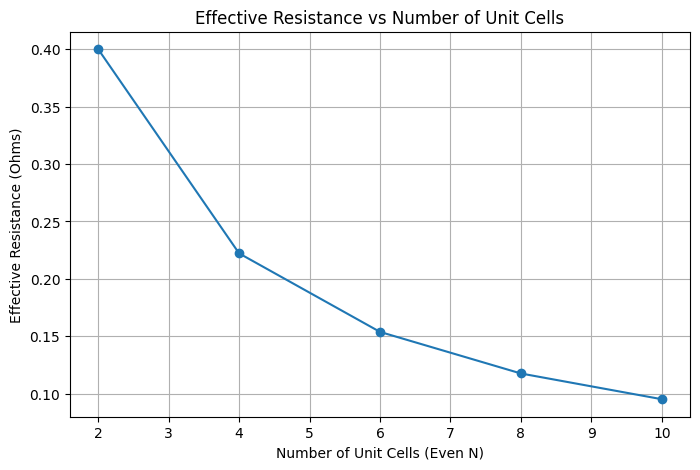

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def build_resistor_matrix(n, r1, r2, r3, r4, vin):

    N = 2*n + 1  # number of unknown currents
    resistor_mat = np.zeros((N, N))
    volt_vec = np.zeros(N)

    resistor_mat[0, 0] = r1
    resistor_mat[0, -1] = r4
    volt_vec[0] = vin

    resistor_mat[1, 0] = r1
    resistor_mat[1, 1] = r2
    if N > 2:
        resistor_mat[1, 2] = r3
    volt_vec[1] = vin

    for i in range(2, N-1):
        if i % 2 == 0:  # bottom nodes
            resistor_mat[i, i-1] = r2
            resistor_mat[i, i+1] = r4
            volt_vec[i] = vin
        else:           # top nodes
            resistor_mat[i, i-1] = 1
            resistor_mat[i, i] = -1
            resistor_mat[i, i+1] = 1
            if i+2 < N:
                resistor_mat[i, i+2] = -1

    # Last row (closing junction) — fully scalable
    resistor_mat[-1, -5:] = [-1, -1, 0, 1, 1] if N >= 5 else [-1]*(N)
    volt_vec[-1] = vin

    return resistor_mat, volt_vec

def effective_resistance(n, r1=1, r2=1, r3=1, r4=1, vin=5):
    resistor_mat, volt_vec = build_resistor_matrix(n, r1, r2, r3, r4, vin)
    currents = np.linalg.lstsq(resistor_mat, volt_vec, rcond=None)[0]
    return vin / sum(currents)  # total current -> R_eq

# Test and plot for increasing even N
Ns = list(range(2, 12, 2))  # 2,4,6,8,10
resistances = [effective_resistance(n) for n in Ns]

plt.figure(figsize=(8,5))
plt.plot(Ns, resistances, marker='o', linestyle='-')
plt.xlabel("Number of Unit Cells (Even N)")
plt.ylabel("Effective Resistance (Ohms)")
plt.title("Effective Resistance vs Number of Unit Cells")
plt.grid(True)
plt.show()
